<a href="https://colab.research.google.com/github/a-cuc/CPE312/blob/main/Prelim/HOA%202.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 312
Code Title: | Predictive Analytics using Machine Learning
1st Semester | AY 2024-2025
<hr> | <hr>
<u>**ACTIVITY NO. 3** | **CLASSIFICATION**
**Name** | Cu, Angelo Luis C.
**Section** | CPE31S3
**Date Performed**: | 9/13/2024
**Date Submitted**: | 9/14/2024
**Instructor**: | Dr. Alonica Villanueva

<hr>

## 1. Objectives

This activity aims to strengthen understanding of classification and ability to demonstrate binary, multiclass, multilabel, and multioutput classification while evaluating model performance.

## 2. Intended Learning Outcomes (ILOs)
After this activity, the students should be able to:
* Demonstrate classification for binary, multiclass, multilabel and multioutput problems.
* Evaluate the performance of different classification models through an analysis of different performance metrics.

## 3. Procedures and Outputs

In the first module, we mentioned that the most common supervised learning tasks are regression (predicting values) and classification (predicting classes). Then, we explored a regression tasks. Now we will turn our attention to classification systems.

### 3.1 MNIST

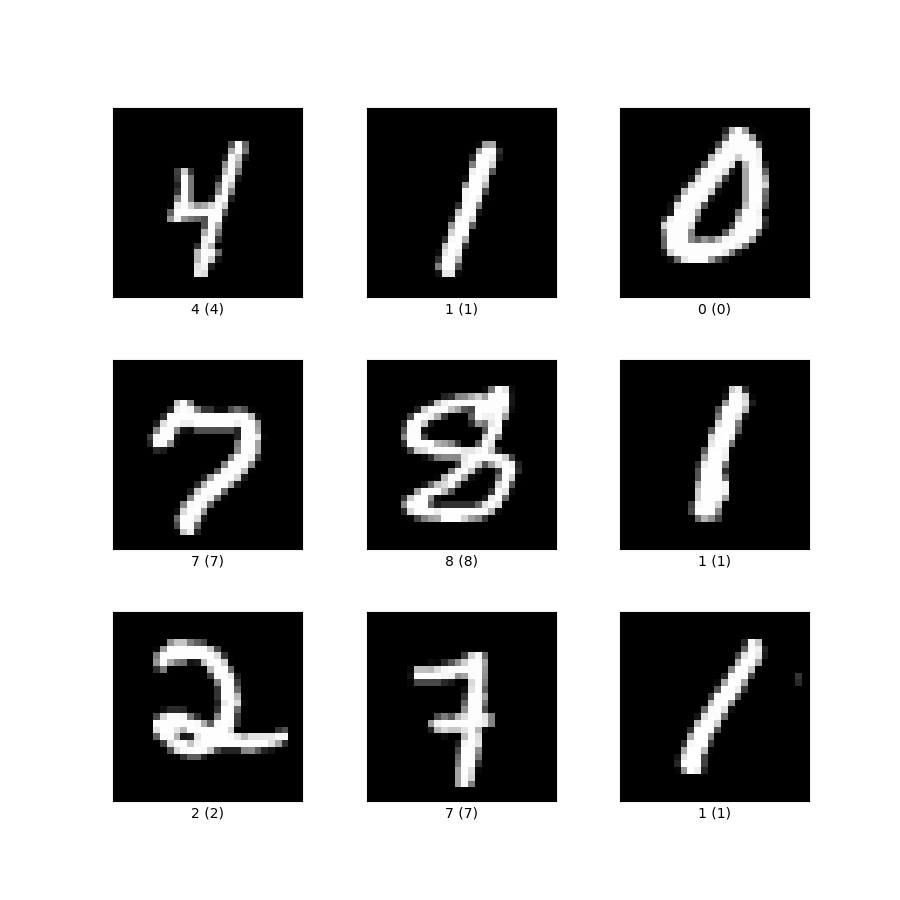

In this chapter, we will be using the MNIST dataset, which is a set of 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau. Each image is labeled with the digit it represents. This set has been studied so much that it is often called the “Hello World” of Machine Learning: whenever people come up with a new classification algorithm, they are curious to see how it will perform on MNIST. Whenever someone learns Machine Learning, sooner or later they tackle MNIST.

Scikit-Learn provides many helper functions to download popular datasets. MNIST is one of them. The following code fetches the MNIST dataset:

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Datasets loaded by Scikit-Learn generally have a similar dictionary structure including:
* A DESCR key describing the dataset
* A data key containing an array with one row per instance and one column per feature
* A target key containing an array with the labels

In [2]:
# extra code – it's a bit too long
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [3]:
mnist.keys()  # extra code – we only use data and target in this notebook

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

There are 70,000 images, and each image has 784 features. This is because each image is 28×28 pixels, and each feature simply represents one pixel’s intensity, from 0
(white) to 255 (black). Let’s take a peek at one digit from the dataset. All you need to do is grab an instance’s feature vector, reshape it to a 28×28 array, and display it using Matplotlib’s imshow() function:

In [4]:
X, y = mnist.data, mnist.target
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
X.shape

(70000, 784)

In [6]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [7]:
y.shape

(70000,)

In [8]:
28 * 28

784

In [9]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "training_linear_models"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

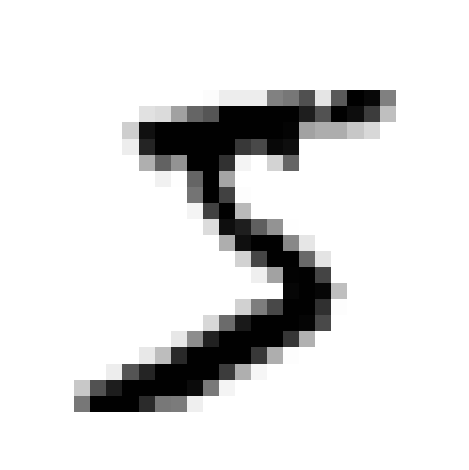

In [10]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
save_fig("some_digit_plot")  # extra code
plt.show()

In [11]:
y[0]

'5'

Note that the label is a string. We prefer numbers, so let’s cast y to integers:

In [12]:
import numpy as np
import pandas as pd

y = y.astype(np.uint8)

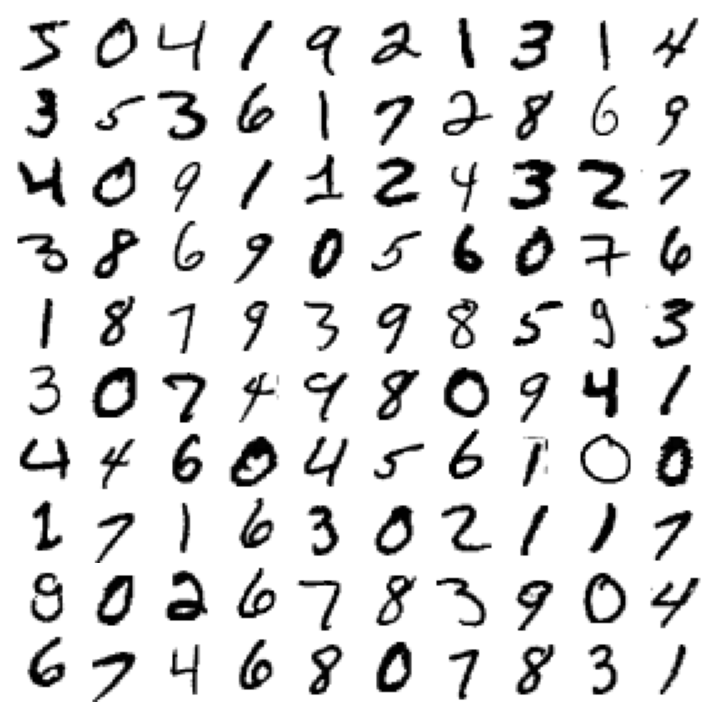

In [13]:
# extra code – this cell generates and saves Figure 3–2
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
save_fig("more_digits_plot", tight_layout=False)
plt.show()

But wait! You should always create a test set and set it aside before inspecting the data closely. The MNIST dataset is actually already split into a training set (the first 60,000 images) and a test set (the last 10,000 images):

In [14]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

The training set is already shuffled for us, which is good as this guarantees that all cross-validation folds will be similar (you don’t want one fold to be missing some digits). Moreover, some learning algorithms are sensitive to the order of the training instances, and they perform poorly if they get many similar instances in a row. **Why do you think shuffling the dataset ensures that this won’t happen?**

<font color="blue"> Cross-validation works by getting a slice of the dataset and testing the model with that sliced dataset. If the data is not shuffled then the slice that the cross-validation would get might only be filled with images of number 5 for example, which would show a better test score than usual.</font>

### 3.2 Training a Binary Classifier

Let’s simplify the problem for now and only try to identify one digit—for example, the number 5. This “5-detector” will be an example of a binary classifier, capable of distinguishing between just two classes, 5 and not-5. Let’s create the target vectors for this classification task:

In [15]:
y_train_5 = (y_train == 5)  # True for all 5s, False for all other digits
y_test_5 = (y_test == 5)

Okay, now let’s pick a classifier and train it. A good place to start is with a Stochastic Gradient Descent (SGD) classifier, using Scikit-Learn’s SGDClassifier class. This classifier has the advantage of being capable of handling very large datasets efficiently.

This is in part because SGD deals with training instances independently, one at a time (which also makes SGD well suited for online learning), as we will see later. Let’s create an SGDClassifier and train it on the whole training set:

In [16]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

**Review: How does SGD work during training? What happens when we do not set the random_state parameter?**

<font color="blue"> Gradient Descent works by fitting a line in the data and then checks if the error is low, it then adjusts this until the error is lowest. In SGD this is done on random instance of the dataset which is useful if the dataset is large. The random_state parameter ensures that the model that we are doing is repeatable and if this is not set the model would still work but if the code is ran again the result would be slightly different</font>

Now you can use it to detect images of the number 5:

In [17]:
sgd_clf.predict([some_digit])

array([ True])

The classifier guesses that this image represents a 5 (True). Looks like it guessed right in this particular case! Now, let’s evaluate this model’s performance.

**Perform a few tests (10 correct digits and 10 incorrect digits) and check the performance of this classifier. How well did it perform?**

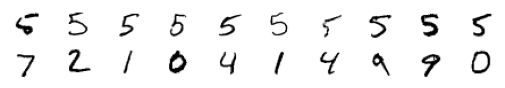

In [18]:
# Gets 10 correct and 10 incorrect digits

true_indices = np.where(y_test == 5)
false_indices = np.where(y_test != 5)

test_digits_true_X = X_test[true_indices][:10]
test_digits_true_y = y_test[true_indices][:10]
test_digits_false_X = X_test[false_indices][:10]
test_digits_false_y = y_test[false_indices][:10]


for idx, image_data in enumerate(test_digits_true_X):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)

for idx, image_data in enumerate(test_digits_false_X):
    idx += 10
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)

In [19]:
sgd_clf.predict(test_digits_true_X)
# The classifier was able to correctly predict 9/10 times
# that the number is 5

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [20]:
sgd_clf.predict(test_digits_false_X)
# The classifier was able to correctly predict 10/10
# that the number is not 5

array([False, False, False, False, False, False, False, False, False,
       False])

### 3.3 Performance Measures

Evaluating a classifier is often significantly trickier than evaluating a regressor, so we will spend a large part of this chapter on this topic. There are many performance metrics available, so we will check them out here!

#### 3.3.1 Measuring Accuracy Using Cross-Validation

A good way to evaluate a model is to use cross-validation.

Let’s use the `cross_val_score()` function to evaluate your SGDClassifier model using K-fold cross-validation, with three folds. Remember that K-fold cross- validation means splitting the training set into K-folds (in this case, three), then mak‐ ing predictions and evaluating them on each fold using a model trained on the remaining folds:

In [21]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

**Analyze the result**:
- What percentage of accuracy was obtained?
- Why did it return 3 values?
- Provide your interpretation of this result.

<font color="blue"> The accuracy ranges from 95-96% in the three results given. There are three results as cv is set to 3, and cv is also known as the number of folds that the data is split into. The results show that the model is highly accurate in predicting whether the handwriting is 5 or not 5.</font>

In [22]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3)  # add shuffle=True if the dataset is not
                                       # already shuffled
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.95035
0.96035
0.9604


In [23]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [24]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

That’s right, it has over 90% accuracy! This is simply because only about 10% of the images are 5s, so if you always guess that an image is not a 5, you will be right about 90% of the time. Beats Nostradamus.

This demonstrates why accuracy is generally not the preferred performance measure for classifiers, especially when you are dealing with skewed datasets (i.e., when some classes are much more frequent than others).


**Analyze the results:**
- How is this dataset skewed?
- Why is the 90% accuracy not reliable?

<font color="blue"> The dataset is skewed as the dataset only contains 10% of 5 compared to the 90% of the other numbers, which means that the model might only be predicting that all of the data is not 5, and it would still be 90% accurate. This also explains why a 90% accuracy is not reliable</font>

#### 3.3.2 Confusion Matrix

A much better way to evaluate the performance of a classifier is to look at the confusion matrix. The general idea is to count the number of times instances of class A are classified as class B. For example, to know the number of times the classifier confused images of 5s with 3s, you would look in the 5th row and 3rd column of the confusion matrix.

To compute the confusion matrix, you first need to have a set of predictions, so they can be compared to the actual targets. You could make predictions on the test set, but let’s keep it untouched for now (remember that you want to use the test set only at the very end of your project, once you have a classifier that you are ready to launch). Instead, you can use the `cross_val_predict()` function:


In [25]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

Just like the `cross_val_score()` function, `cross_val_predict()` performs K-fold cross-validation, but instead of returning the evaluation scores, it returns the predictions made on each test fold. This means that you get a clean prediction for each instance in the training set (“clean” meaning that the prediction is made by a model that never saw the data during training).



Now you are ready to get the confusion matrix using the confusion_matrix() function. Just pass it the target classes (y_train_5) and the predicted classes (y_train_pred):

In [26]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

**Provide an analysis of the confusion matrix as instructed earlier. How well did it perform based on this metric**?

<font color="blue"> The confusion matrix suggests that there is a high amount of false negatives, where the image is actually a number 5 but the model predicted that it is not a number 5.</font>

In [27]:
y_train_perfect_predictions = y_train_5  # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

The confusion matrix gives you a lot of information, but sometimes you may prefer a more concise metric. An interesting one to look at is the accuracy of the positive predictions; this is called the precision of the classifier.

**What useful information can be obtained from the precision of a model?** Provide an analysis.

<font color="blue"> Precision gives as a measure of how accurate are the yes predictions, in this case how often does the model correctly predict the number 5.</font>

#### 3.3.3 Precision and Recall

In this section, we are looking at how precision and recall affect the perform of your classifier.

**But first, define** what is precision and recall?

<font color="blue"> Precision is defined in the last cell, and recall is how often it gets true positives, in this case how often does the model predict 5 out of all the 5s in the model. </font>

In [28]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)  # == 3530 / (687 + 3530)

0.8370879772350012

In [29]:
# extra code – this cell also computes the precision: TP / (FP + TP)
cm[1, 1] / (cm[0, 1] + cm[1, 1])

0.8370879772350012

In [30]:
recall_score(y_train_5, y_train_pred)  # == 3530 / (1891 + 3530)

0.6511713705958311

In [31]:
# extra code – this cell also computes the recall: TP / (FN + TP)
cm[1, 1] / (cm[1, 0] + cm[1, 1])

0.6511713705958311

**Question:** Provide an analysis of the results from the codes above. Then define, what is f1 score and why is it an important metric?

<font color="blue"> The results suggest a high precision but low recall, which mean that when the model predicts a 5, there is a high chance that it is correct. However, it was not able to predict all the 5s in the dataset. The f1 score is a metric that combines precision and recall and is between 0 and 1, where the closer it is to 1, the better.</font>

In [32]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [33]:
# extra code – this cell also computes the f1 score
cm[1, 1] / (cm[1, 1] + (cm[1, 0] + cm[0, 1]) / 2)

0.7325171197343847

#### 3.3.4 The ROC Curve

**Before proceeding, what is the relationship between precision and recall?**

<font color="blue"> Precision and recall have a negative correlation, where if precision increases, recall decreases and vice versa.</font>

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. It is very similar to the precision/recall curve, but instead of plotting precision versus recall, the ROC curve plots the true positive rate (another name for recall) against the false positive rate. The FPR is the ratio of negative instances that are incorrectly classified as positive. It is equal to one minus the true negative rate, which is the ratio of negative instances that are correctly classified as negative. The TNR is also called specificity. Hence the ROC curve plots sensitivity (recall) versus 1 – specificity.

In [34]:
from sklearn.metrics import roc_curve

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

**Question** Why do we need to compute for the fpr and tpr? What does the `roc_curve()` function do?

<font color="blue"> The false positive and true positive rate is useful in creating the ROC curve, which graphs the different rates in different threshold, where the threshold is the point where the model will decide either yes or no for binary classifiers</font>

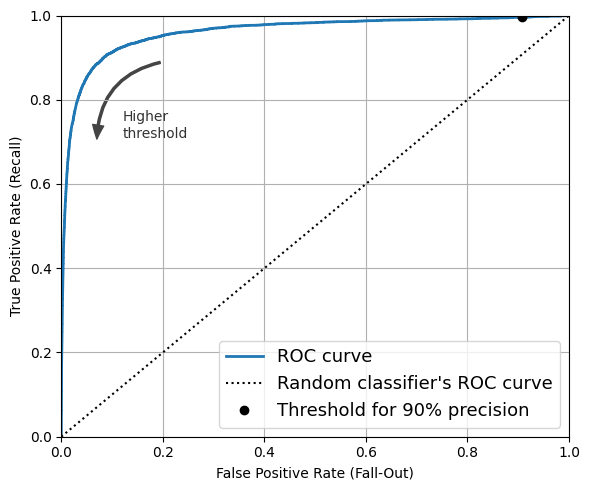

In [35]:
from matplotlib import patches

threshold_for_90_precision = thresholds[np.argmax(fpr >= 0.90)]
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")

# extra code – just beautifies and saves Figure 3–7
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)
save_fig("roc_curve_plot")

plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

**Question** Provide an analysis of this tradeoff between precision and recall.

<font color="blue"> Since a higher precision leads to a lower recall and vice versa, there is a need for us to select which one should we prioritize, with some applications needing a higher precision or others needing a higher recall.</font>

### 3.4 Multiclass Classification

Whereas binary classifiers distinguish between two classes, multiclass classifiers (also called multinomial classifiers) can distinguish between more than two classes.


Some algorithms (such as Random Forest classifiers or naive Bayes classifiers) are capable of handling multiple classes directly. Others (such as Support Vector Machine classifiers or Linear classifiers) are strictly binary classifiers. However, there are vari‐ ous strategies that you can use to perform multiclass classification using multiple binary classifiers.

**Question:** Some strategies used for multiclass classification is OvO and OvA. Briefly research and discuss what is OvO and OvA?

<font color="blue"> OvO is also called One vs One strategy where we create a binary classifier between each class (eg. class 1 vs class 2, class 2 vs class 3) and also select the one with the highest probability. OvA on the other hand is also known as One vs All strategy where we train one binary classifier for each class (eg. Class 1 vs Not Class 1) and select the one with the highest probability</font>

Scikit-Learn detects when you try to use a binary classification algorithm for a multiclass classification task, and it automatically runs OvA (except for SVM classifiers for which it uses OvO). Let’s try this with the SGDClassifier:

In [ ]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [ ]:
sgd_clf.decision_function([some_digit]).round()

array([[-31893., -34420.,  -9531.,   1824., -22320.,  -1386., -26189.,
        -16148.,  -4604., -12051.]])

**Warning:** the following two cells may take a few minutes each to run:

In [ ]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy", n_jobs=-1)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


array([0.8983, 0.891 , 0.9018])

**Question**: What is your analysis of the result here? What happened to the SGDClassifier?

Hypertune the parameters to achieve a 95% accuracy.

<font color="blue"> The first result shows an 85-87% accuracy, whereas if the data is scaled, the accuracy goes up to 89-90% accuracy. This suggests that SGDClassifier is sensitive to incorrectly scaled data (eg. One feature ranges from 0-10 whereas another feature ranges from 0-1000)</font>

In [ ]:
from sklearn.model_selection import GridSearchCV

# SGDClassifier has different parameters which could help us achieve higher accuracy
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

# We can use GridSearchCV to find the ideal parameters to get better results
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html


parameters = {
    'loss' : ['log_loss'],
    'alpha' : [0.001, 0.01],
    'learning_rate' : ['adaptive'],
    'max_iter' : [1000, 5000,10000],
    'eta0' : [0.01, 0.1],
    'early_stopping' : [True]
}
# I did not implement cross-validation as the computing time becomes too long
search = GridSearchCV(sgd_clf, parameters, scoring='accuracy', cv=[(slice(None), slice(None))], n_jobs=-1, verbose=3)
search.fit(X_train_scaled, y_train)

Fitting 1 folds for each of 12 candidates, totalling 12 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


GridSearchCV(cv=[(slice(None, None, None), slice(None, None, None))],
             estimator=SGDClassifier(random_state=0), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01], 'early_stopping': [True],
                         'eta0': [0.01, 0.1], 'learning_rate': ['adaptive'],
                         'loss': ['log_loss'],
                         'max_iter': [1000, 5000, 10000]},
             scoring='accuracy', verbose=3)

In [ ]:
print('GridSearch CV best score: {:.4f}\n\n'.format(search.best_score_))

GridSearch CV best score: 0.9700




In [ ]:
print('Parameters that give the best results: \n\n',(search.best_params_))

Parameters that give the best results: 

 {'alpha': 0.001, 'early_stopping': True, 'eta0': 0.01, 'learning_rate': 'adaptive', 'loss': 'log_loss', 'max_iter': 1000}


## 4. Supplementary Activity

Solve the following exercise:

1. Create your own dataset using your own handwriting.
2. Train the same model that was used in section 3 with your own dataset, observe the result.
3. How does MNIST dataset perform on your handwriting?
4. How does your custom dataset perform on any digit from the MNIST dataset?

Provide an analysis that provides an overview of the multiclass classification metrics.

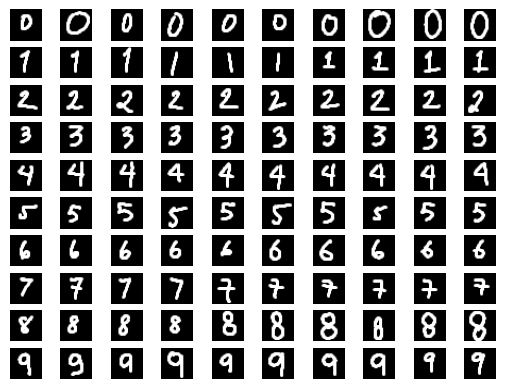

In [36]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

images = []
idx = 0
for i in range(0, 10):
  for j in range(0,10):
    idx+=1
    image = cv2.imread('/content/supplementary_images/'+str(i)+'_'+str(j)+'.png', cv2.IMREAD_GRAYSCALE)
    image_resized = cv2.resize(image, (28,28))
    image_resized = cv2.bitwise_not(image_resized)
    images.append(image_resized)
    plt.subplot(10, 10, idx)
    plt.axis('off')
    plt.imshow(image, cmap='binary')

In [37]:
df = pd.DataFrame()
for image in images:
  data = image.flatten()
  data_series = pd.Series(data)
  df = pd.concat([df, data_series.to_frame().T], ignore_index=True)
df

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
target = [i for i in range(10) for j in range(10)]
target = np.array(target)
df = df.assign(target=target)
df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [39]:
X = df.drop(['target'], axis=1)
y = df['target']

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

sgd_clf = SGDClassifier(random_state=0)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=0)

In [42]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")
# The result is worse compared to the mnist dataset
# which might be due to my dataset being smaller than mnist

array([0.66666667, 0.7037037 , 0.69230769])

In [46]:
# Trying hypertuning paramters to get a higher accuracy
from sklearn.model_selection import GridSearchCV

parameters = {
    'loss' : ['log_loss', 'squared_hinge'],
    'alpha' : [0.001, 0.01],
    'learning_rate' : ['adaptive', 'invscaling'],
    'max_iter' : [1000, 5000,10000],
    'eta0' : [0.01, 0.1],
}

search = GridSearchCV(sgd_clf, parameters, scoring='accuracy', cv=3, n_jobs=-1, verbose=3)
search.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3, estimator=SGDClassifier(random_state=0), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01], 'eta0': [0.01, 0.1],
                         'learning_rate': ['adaptive', 'invscaling'],
                         'loss': ['log_loss', 'squared_hinge'],
                         'max_iter': [1000, 5000, 10000]},
             scoring='accuracy', verbose=3)

In [48]:
print('GridSearch CV best score: {:.4f}'.format(search.best_score_))

GridSearch CV best score: 0.7877


In [50]:
print('Parameters that give the best results:',(search.best_params_))

Parameters that give the best results: {'alpha': 0.001, 'eta0': 0.01, 'learning_rate': 'invscaling', 'loss': 'log_loss', 'max_iter': 1000}


In [51]:
# Testing the model with the MNIST dataset
X_mnist, y_mnist = mnist.data, mnist.target

sgd_clf = SGDClassifier(
    random_state = 0, loss='log_loss', alpha = 0.001, eta0 = 0.01, max_iter=1000, learning_rate='invscaling')
sgd_clf.fit(X_train, y_train)

mnist_scaler = StandardScaler()
X_mnist = mnist_scaler.fit_transform(X_mnist)

cross_val_score(sgd_clf, X_mnist, y_mnist, cv=3, scoring="accuracy")

# It can be seen that the results are good (87%-89%),
# but is worse compared to a model trained with the MNIST dataset itself

array([0.87901774, 0.87678395, 0.89088416])

## 5. Summary, Conclusions and Lessons Learned

I have learned the idea behind classification. In this activity, I used the Stochastic Gradient Descent to classify different numbers with the MNIST dataset and my personal dataset. I also learned ways to evaluate the accuracy of the model using different metrics. Finally, I have learned the different types of classification such as binary and multiclass classification.

<hr/>

***Proprietary Clause***

*Property of the Technological Institute of the Philippines (T.I.P.). No part of the materials made and uploaded in this learning management system by T.I.P. may be copied, photographed, printed, reproduced, shared, transmitted, translated, or reduced to any electronic medium or machine-readable form, in whole or in part, without the prior consent of T.I.P.*

***Disclaimer***

*Contents of this Notebook are based on Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow 3rd Edition by Aurelien Geron*
*A copy of the complete text can be obtained here: https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/*